# 1. Источник данных (Extract)


In [26]:
import pandas as pd
df_film = pd.read_csv("content_film_work.csv", sep=";")
df_film['created'] = pd.to_datetime(df_film['created'], errors='coerce')
df_film['creation_date'] = df_film['created'].dt.year
df_film

,id,title,description,creation_date,rating,type,created,modified
0,3d825f60-9fff-4dfe-b294-1a45fa1e115d,Star Wars: Episode IV - A New Hope,"The Imperial Forces, under orders from cruel D...",2021,8.6,movie,2021-06-16 20:14:09.221838,2021-06-16 20:14:09.221855
1,0312ed51-8833-413f-bff5-0e139c11264a,Star Wars: Episode V - The Empire Strikes Back,"Luke Skywalker, Han Solo, Princess Leia and Ch...",2021,8.7,movie,2021-06-16 20:14:09.221939,2021-06-16 20:14:09.221958
2,025c58cd-1b7e-43be-9ffb-8571a613579b,Star Wars: Episode VI - Return of the Jedi,Luke Skywalker battles horrible Jabba the Hut ...,2021,8.3,movie,2021-06-16 20:14:09.221999,2021-06-16 20:14:09.222016
3,cddf9b8f-27f9-4fe9-97cb-9e27d4fe3394,Star Wars: Episode VII - The Force Awakens,30 years after the defeat of Darth Vader and t...,2021,7.9,movie,2021-06-16 20:14:09.222053,2021-06-16 20:14:09.222069
4,3b914679-1f5e-4cbd-8044-d13d35d5236c,Star Wars: Episode I - The Phantom Menace,"The evil Trade Federation, led by Nute Gunray ...",2021,6.5,movie,2021-06-16 20:14:09.222105,2021-06-16 20:14:09.222122
...,...,...,...,...,...,...,...,...
994,edc66eec-eda9-4541-af98-4ec4012a740d,The Falling Star,NaN,2021,6.3,movie,2021-06-16 20:14:09.271646,2021-06-16 20:14:09.271662
995,7bfff4ff-2692-41d0-a669-fbfbdaddcd72,A Football Star Called Divine: Life and Work o...,NaN,2021,7.5,movie,2021-06-16 20:14:09.271693,2021-06-16 20:14:09.271709
996,d0e7e53a-8de1-4a21-b869-4ff8fc0e846e,1983 MLB All-Star Game,NaN,2021,6.5,movie,2021-06-16 20:14:09.271740,2021-06-16 20:14:09.271756
997,82374933-7716-4d6d-aa27-e9e19c1c6c24,Star Wars: Qui-Gon Jinn II,Qu-Gon Jinn's adventures get more dangerous as...,2021,7.2,movie,2021-06-16 20:14:09.271787,2021-06-16 20:14:09.271802


# 2. Трансформация данных (Transform)

In [28]:
df_film['rating'] = pd.to_numeric(df_film['rating'], errors='coerce')
print(df_film['rating'].dtype)


float64


In [38]:
null_count = df_film['rating'].isna().sum()
comma_count = df_film['rating'].astype(str).str.contains(",", na=False).sum()
print(f"Пустых значений в rating: {null_count}")
print(f"Значений с запятой в rating: {comma_count}")

Пустых значений в rating: 1
Значений с запятой в rating: 0


In [42]:
df_film = df_film.dropna(subset=['rating'])
null_count = df_film['rating'].isna().sum()
print(f"Пустых значений в rating: {null_count}")

Пустых значений в rating: 0


In [46]:
df_genre_film = pd.read_csv("content_genre_film_work.csv", sep=";")
df_genre = pd.read_csv("content_genre.csv", sep=";")
df_person_film = pd.read_csv("content_person_film_work.csv", sep=";")
df_person = pd.read_csv("content_person.csv", sep=";")
# Проверка дубликатов в каждой таблице (по всем столбцам)
print("=== Дубликаты в таблицах (полное совпадение всех колонок) ===")
for name, df in [
    ("content_genre_film_work.csv", df_genre_film),
    ("content_genre.csv", df_genre),
    ("content_person_film_work.csv", df_person_film),
    ("content_person.csv", df_person),
]:
    dup_all = df.duplicated().sum()
    print(f"{name}: найдено {dup_all} строк-дубликатов (по всем колонкам).")
    if dup_all > 0:
        # Покажем первые 5 дублирующихся строк
        print(df[df.duplicated()].head())
    print()

dup_genre_links = df_genre_film.duplicated(subset=["film_work_id", "genre_id"]).sum()
print("Дубликаты в content_genre_film_work по (film_work_id, genre_id):", dup_genre_links)
if dup_genre_links > 0:
    print(df_genre_film[df_genre_film.duplicated(subset=["film_work_id", "genre_id"])].head())
print()

=== Дубликаты в таблицах (полное совпадение всех колонок) ===
content_genre_film_work.csv: найдено 0 строк-дубликатов (по всем колонкам).

content_genre.csv: найдено 0 строк-дубликатов (по всем колонкам).

content_person_film_work.csv: найдено 0 строк-дубликатов (по всем колонкам).

content_person.csv: найдено 0 строк-дубликатов (по всем колонкам).

Дубликаты в content_genre_film_work по (film_work_id, genre_id): 0



In [52]:
film_genre_linked = df_film.merge(
    df_genre_film,
    left_on="id",
    right_on="film_work_id",
    how="inner",           
    suffixes=("", "_link")
)


film_genre_df = film_genre_linked.merge(
    df_genre,
    left_on="genre_id",
    right_on="id",
    how="inner",
    suffixes=("", "_genre")
)
film_genre_df

,id,title,description,creation_date,rating,type,created,modified,id_link,genre_id,film_work_id,created_link,id_genre,name,description_genre,created_genre,modified_genre
0,3d825f60-9fff-4dfe-b294-1a45fa1e115d,Star Wars: Episode IV - A New Hope,"The Imperial Forces, under orders from cruel D...",2021,8.6,movie,2021-06-16 20:14:09.221838,2021-06-16 20:14:09.221855,9db02d9c-fa21-4c7e-8129-31e665a1566b,3d8d9bf5-0d90-4353-88ba-4ccc5d2c07ff,3d825f60-9fff-4dfe-b294-1a45fa1e115d,2021-06-16 20:14:09.585647,3d8d9bf5-0d90-4353-88ba-4ccc5d2c07ff,Action,NaN,2021-06-16 20:14:09.309735,2021-06-16 20:14:09.309765
1,3d825f60-9fff-4dfe-b294-1a45fa1e115d,Star Wars: Episode IV - A New Hope,"The Imperial Forces, under orders from cruel D...",2021,8.6,movie,2021-06-16 20:14:09.221838,2021-06-16 20:14:09.221855,8b7f874b-4232-425e-8cb0-c1564bf1d377,6c162475-c7ed-4461-9184-001ef3d9f26e,3d825f60-9fff-4dfe-b294-1a45fa1e115d,2021-06-16 20:14:09.590673,6c162475-c7ed-4461-9184-001ef3d9f26e,Sci-Fi,NaN,2021-06-16 20:14:09.309917,2021-06-16 20:14:09.309934
2,3d825f60-9fff-4dfe-b294-1a45fa1e115d,Star Wars: Episode IV - A New Hope,"The Imperial Forces, under orders from cruel D...",2021,8.6,movie,2021-06-16 20:14:09.221838,2021-06-16 20:14:09.221855,d323256c-aa1f-445e-9a6b-0b21c173281c,b92ef010-5e4c-4fd0-99d6-41b6456272cd,3d825f60-9fff-4dfe-b294-1a45fa1e115d,2021-06-16 20:14:09.633149,b92ef010-5e4c-4fd0-99d6-41b6456272cd,Fantasy,NaN,2021-06-16 20:14:09.309869,2021-06-16 20:14:09.309886
3,3d825f60-9fff-4dfe-b294-1a45fa1e115d,Star Wars: Episode IV - A New Hope,"The Imperial Forces, under orders from cruel D...",2021,8.6,movie,2021-06-16 20:14:09.221838,2021-06-16 20:14:09.221855,387f3a01-ac87-43a8-8543-9a36aa043588,120a21cf-9097-479e-904a-13dd7198c1dd,3d825f60-9fff-4dfe-b294-1a45fa1e115d,2021-06-16 20:14:09.652251,120a21cf-9097-479e-904a-13dd7198c1dd,Adventure,NaN,2021-06-16 20:14:09.309818,2021-06-16 20:14:09.309836
4,0312ed51-8833-413f-bff5-0e139c11264a,Star Wars: Episode V - The Empire Strikes Back,"Luke Skywalker, Han Solo, Princess Leia and Ch...",2021,8.7,movie,2021-06-16 20:14:09.221939,2021-06-16 20:14:09.221958,3f5fd1af-3463-439a-8b3d-7a3cc6ce0317,120a21cf-9097-479e-904a-13dd7198c1dd,0312ed51-8833-413f-bff5-0e139c11264a,2021-06-16 20:14:09.583785,120a21cf-9097-479e-904a-13dd7198c1dd,Adventure,NaN,2021-06-16 20:14:09.309818,2021-06-16 20:14:09.309836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,d0e7e53a-8de1-4a21-b869-4ff8fc0e846e,1983 MLB All-Star Game,NaN,2021,6.5,movie,2021-06-16 20:14:09.271740,2021-06-16 20:14:09.271756,c76de42a-3bfa-4f19-abe6-9f6bfe8f2059,2f89e116-4827-4ff4-853c-b6e058f71e31,d0e7e53a-8de1-4a21-b869-4ff8fc0e846e,2021-06-16 20:14:09.622367,2f89e116-4827-4ff4-853c-b6e058f71e31,Sport,NaN,2021-06-16 20:14:09.310861,2021-06-16 20:14:09.310878
2225,82374933-7716-4d6d-aa27-e9e19c1c6c24,Star Wars: Qui-Gon Jinn II,Qu-Gon Jinn's adventures get more dangerous as...,2021,7.2,movie,2021-06-16 20:14:09.271787,2021-06-16 20:14:09.271802,7cd2ddb6-f6e7-4238-9936-e8fd700514f6,3d8d9bf5-0d90-4353-88ba-4ccc5d2c07ff,82374933-7716-4d6d-aa27-e9e19c1c6c24,2021-06-16 20:14:09.626803,3d8d9bf5-0d90-4353-88ba-4ccc5d2c07ff,Action,NaN,2021-06-16 20:14:09.309735,2021-06-16 20:14:09.309765
2226,82374933-7716-4d6d-aa27-e9e19c1c6c24,Star Wars: Qui-Gon Jinn II,Qu-Gon Jinn's adventures get more dangerous as...,2021,7.2,movie,2021-06-16 20:14:09.271787,2021-06-16 20:14:09.271802,35098d38-c62b-4c65-b278-100f7aa91f25,6c162475-c7ed-4461-9184-001ef3d9f26e,82374933-7716-4d6d-aa27-e9e19c1c6c24,2021-06-16 20:14:09.631985,6c162475-c7ed-4461-9184-001ef3d9f26e,Sci-Fi,NaN,2021-06-16 20:14:09.309917,2021-06-16 20:14:09.309934
2227,3bdae84f-9a04-4b04-9f7c-c05582d529e5,Star Wars: Qui-Gon Jinn III,The Jedi temple gets attacked by an army of Si...,2021,7.2,movie,2021-06-16 20:14:09.271835,2021-06-16 20:14:09.27185,f80929cb-d5b3-4183-872a-b77968e1cdad,3d8d9bf5-0d90-4353-88ba-4ccc5d2c07ff,3bdae84f-9a04-4b04-9f7c-c05582d529e5,2021-06-16 20:14:09.602835,3d8d9b

In [56]:
film_genre_df_cleaned = film_genre_df[[
    "id", "title", "description", "creation_date", "rating", "type", "genre_id", "name"
]].rename(columns={
    "id": "film_id",
    "name": "genre_name"
})

film_genre_df_cleaned

,film_id,title,description,creation_date,rating,type,genre_id,genre_name
0,3d825f60-9fff-4dfe-b294-1a45fa1e115d,Star Wars: Episode IV - A New Hope,"The Imperial Forces, under orders from cruel D...",2021,8.6,movie,3d8d9bf5-0d90-4353-88ba-4ccc5d2c07ff,Action
1,3d825f60-9fff-4dfe-b294-1a45fa1e115d,Star Wars: Episode IV - A New Hope,"The Imperial Forces, under orders from cruel D...",2021,8.6,movie,6c162475-c7ed-4461-9184-001ef3d9f26e,Sci-Fi
2,3d825f60-9fff-4dfe-b294-1a45fa1e115d,Star Wars: Episode IV - A New Hope,"The Imperial Forces, under orders from cruel D...",2021,8.6,movie,b92ef010-5e4c-4fd0-99d6-41b6456272cd,Fantasy
3,3d825f60-9fff-4dfe-b294-1a45fa1e115d,Star Wars: Episode IV - A New Hope,"The Imperial Forces, under orders from cruel D...",2021,8.6,movie,120a21cf-9097-479e-904a-13dd7198c1dd,Adventure
4,0312ed51-8833-413f-bff5-0e139c11264a,Star Wars: Episode V - The Empire Strikes Back,"Luke Skywalker, Han Solo, Princess Leia and Ch...",2021,8.7,movie,120a21cf-9097-479e-904a-13dd7198c1dd,Adventure
...,...,...,...,...,...,...,...,...
2224,d0e7e53a-8de1-4a21-b869-4ff8fc0e846e,1983 MLB All-Star Game,NaN,2021,6.5,movie,2f89e116-4827-4ff4-853c-b6e058f71e31,Sport
2225,82374933-7716-4d6d-aa27-e9e19c1c6c24,Star Wars: Qui-Gon Jinn II,Qu-Gon Jinn's adventures get more dangerous as...,2021,7.2,movie,3d8d9bf5-0d90-4353-88ba-4ccc5d2c07ff,Action
2226,82374933-7716-4d6d-aa27-e9e19c1c6c24,Star Wars: Qui-Gon Jinn II,Qu-Gon Jinn's adventures get more dangerous as...,2021,7.2,movie,6c162475-c7ed-4461-9184-001ef3d9f26e,Sci-Fi
2227,3bdae84f-9a04-4b04-9f7c-c05582d529e5,Star Wars: Qui-Gon Jinn III,The Jedi temple gets attacked by an army of Si...,2021,7.2,movie,3d8d9bf5-0d90-4353-88ba-4ccc5d2c07ff,Action


In [58]:
film_person_linked = df_film.merge(
    df_person_film,
    left_on="id",
    right_on="film_work_id",
    how="inner",
    suffixes=("", "_link")
)

film_person_df = film_person_linked.merge(
    df_person,
    left_on="person_id",
    right_on="id",
    how="inner",
    suffixes=("", "_person")
)

film_person_df = film_person_df[[
    "id", "title", "person_id", "full_name", "role"
]].rename(columns={
    "id": "film_id"
})

film_person_df

,film_id,title,person_id,full_name,role
0,3d825f60-9fff-4dfe-b294-1a45fa1e115d,Star Wars: Episode IV - A New Hope,e039eedf-4daf-452a-bf92-a0085c68e156,Peter Cushing,actor
1,3d825f60-9fff-4dfe-b294-1a45fa1e115d,Star Wars: Episode IV - A New Hope,b5d2b63a-ed1f-4e46-8320-cf52a32be358,Carrie Fisher,actor
2,3d825f60-9fff-4dfe-b294-1a45fa1e115d,Star Wars: Episode IV - A New Hope,5b4bf1bc-3397-4e83-9b17-8b10c6544ed1,Harrison Ford,actor
3,3d825f60-9fff-4dfe-b294-1a45fa1e115d,Star Wars: Episode IV - A New Hope,26e83050-29ef-4163-a99d-b546cac208f8,Mark Hamill,actor
4,3d825f60-9fff-4dfe-b294-1a45fa1e115d,Star Wars: Episode IV - A New Hope,a5a8f573-3cee-4ccc-8a2b-91cb9f55250a,George Lucas,director
...,...,...,...,...,...
5771,3bdae84f-9a04-4b04-9f7c-c05582d529e5,Star Wars: Qui-Gon Jinn III,e84b46b0-1623-41d1-8ab8-26db182d1261,Marina Janhunen Calder?n,actor
5772,3bdae84f-9a04-4b04-9f7c-c05582d529e5,Star Wars: Qui-Gon Jinn III,08524e56-38a3-411a-8c30-dfca9b54aca0,Pauli Janhunen Calder?n,director
5773,3bdae84f-9a04-4b04-9f7c-c05582d529e5,Star Wars: Qui-Gon Jinn III,06c281cf-c2be-46b7-930c-8f4975f07b02,David Anghel,writer
5774,3bdae84f-9a04-4b04-9f7c-c05582d529e5,Star Wars: Qui-Gon Jinn III,b35228ed-88b4-4f64-90c4-00d4953c053b,Emilio Janhunen Calder?n,actor


# Загрузка данных (Load)

## Сохранение агрегированных таблиц в .csv

In [63]:
films_by_year = film_genre_df_cleaned.groupby('creation_date').agg(
    total_films=('film_id', 'nunique')
).reset_index()

avg_rating_by_year = film_genre_df_cleaned.groupby('creation_date').agg(
    avg_rating=('rating', 'mean')
).reset_index()

genre_stats = film_genre_df_cleaned.groupby('genre_name').agg(
    num_films=('film_id', 'nunique'),
    avg_rating=('rating', 'mean')
).reset_index()

role_distribution = film_person_df.groupby('role').agg(
    num_people=('person_id', 'nunique'),
    appearances=('film_id', 'count')
).reset_index()

actor_top10 = film_person_df.query("role == 'actor'").groupby('full_name').agg(
    num_films=('film_id', 'nunique')
).sort_values(by='num_films', ascending=False).head(10).reset_index()


rating_histogram = film_genre_df_cleaned['rating'].round().value_counts().sort_index().reset_index()
rating_histogram.columns = ['rating_rounded', 'count']

type_distribution = film_genre_df_cleaned.groupby('type').agg(
    count=('film_id', 'nunique')
).reset_index()


In [69]:
films_by_year.to_csv("films_by_year.csv", index=False)
avg_rating_by_year.to_csv("avg_rating_by_year.csv", index=False)
genre_stats.to_csv("genre_stats.csv", index=False)
role_distribution.to_csv("role_distribution.csv", index=False)
actor_top10.to_csv("actor_top10.csv", index=False)
rating_histogram.to_csv("rating_histogram.csv", index=False)
type_distribution.to_csv("type_distribution.csv", index=False)

## Загрузка в SQL Server

In [5]:
import pandas as pd
from sqlalchemy import create_engine

# Подключение к SQL Server через Windows Authentication
server = 'DESKTOP-VMQG472\SQLEXPRESS'
database = 'FilmAnalyticsDB'
driver = 'ODBC Driver 17 for SQL Server'

engine = create_engine(f"mssql+pyodbc://@{server}/{database}?driver={driver}&trusted_connection=yes")

tables = [
    ("films_by_year.csv", "films_by_year"),
    ("avg_rating_by_year.csv", "avg_rating_by_year"),
    ("genre_stats.csv", "genre_stats"),
    ("role_distribution.csv", "role_distribution"),
    ("actor_top10.csv", "actor_top10"),
    ("rating_histogram.csv", "rating_histogram"),
    ("type_distribution.csv", "type_distribution"),
]

for csv_file, table_name in tables:
    df = pd.read_csv(csv_file)
    df.to_sql(table_name, con=engine, if_exists="replace", index=False)
    print(f"✅ Загружено в таблицу: {table_name}")


✅ Загружено в таблицу: films_by_year
✅ Загружено в таблицу: avg_rating_by_year
✅ Загружено в таблицу: genre_stats
✅ Загружено в таблицу: role_distribution
✅ Загружено в таблицу: actor_top10
✅ Загружено в таблицу: rating_histogram
✅ Загружено в таблицу: type_distribution


## Визуализация

### A1. Кол-во фильмов по годам (creation_date)

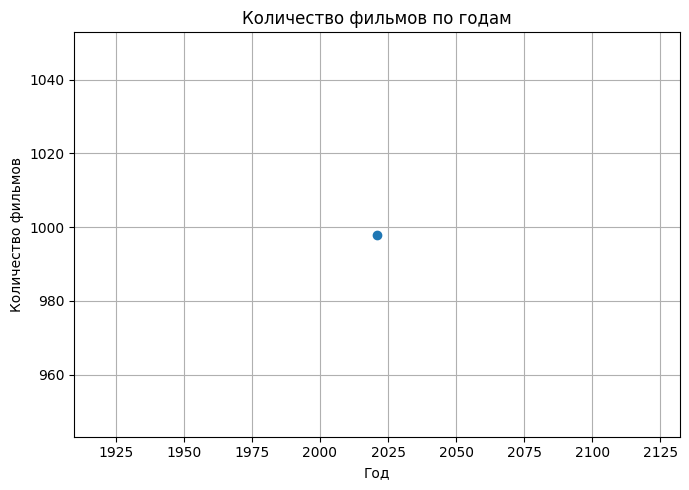

In [18]:
import matplotlib.pyplot as plt
films_by_year = pd.read_csv("films_by_year.csv")
plt.figure(figsize=(7,5))
plt.plot(films_by_year['creation_date'], films_by_year['total_films'], marker='o')
plt.title('Количество фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.grid(True)
plt.tight_layout()
plt.show()

### A2.Средняя оценка фильмов (rating) по годам

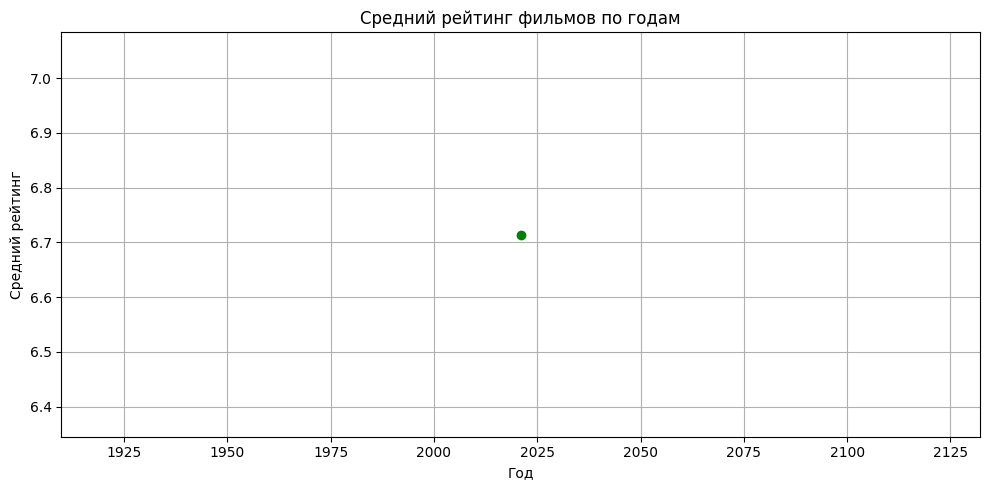

In [27]:
avg_rating_by_year = pd.read_csv("avg_rating_by_year.csv")
plt.figure(figsize=(10, 5))
plt.plot(avg_rating_by_year['creation_date'], avg_rating_by_year['avg_rating'], color='green', marker='o')
plt.title('Средний рейтинг фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Средний рейтинг')
plt.grid(True)
plt.tight_layout()
plt.show()

# визуализация хромает так как все фильмы из csv файлов 2021 года и других годов нету

### B1. Кол-во фильмов по жанрам


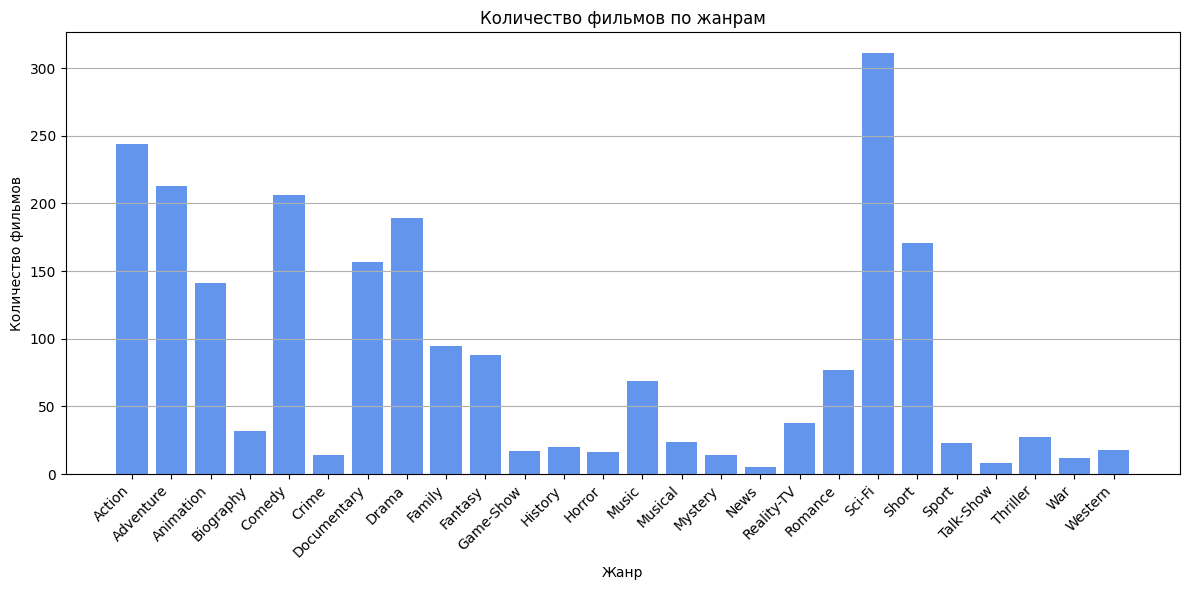

In [31]:
df_genre = pd.read_csv("genre_stats.csv")
plt.figure(figsize=(12, 6))
plt.bar(df_genre['genre_name'], df_genre['num_films'], color='cornflowerblue')
plt.title("Количество фильмов по жанрам")
plt.xlabel("Жанр")
plt.ylabel("Количество фильмов")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### B2. Топ-10 жанров по числу фильмов

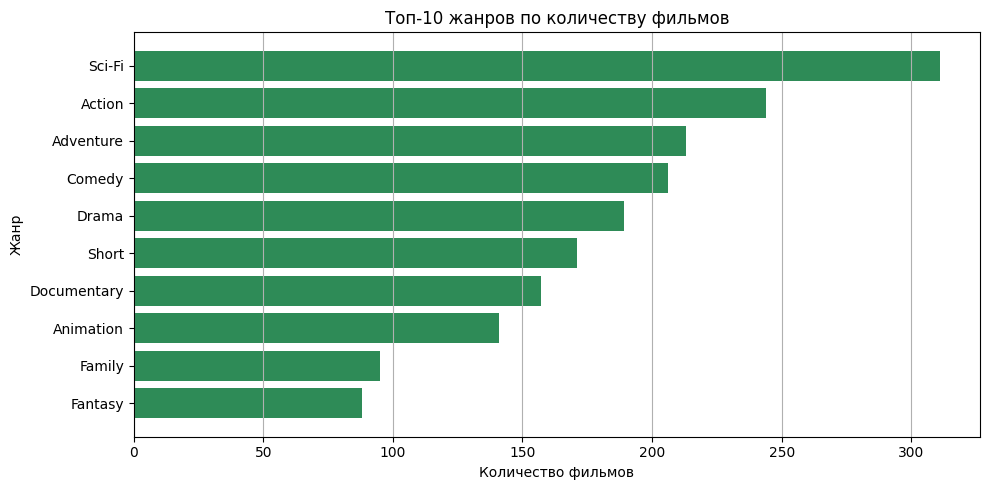

In [34]:
top10_genres = df_genre.sort_values(by='num_films', ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.barh(top10_genres['genre_name'], top10_genres['num_films'], color='seagreen')
plt.title("Топ-10 жанров по количеству фильмов")
plt.xlabel("Количество фильмов")
plt.ylabel("Жанр")
plt.gca().invert_yaxis()  
plt.grid(axis='x')
plt.tight_layout()
plt.show()


### C1. Распределение ролей (actor, writer, director)

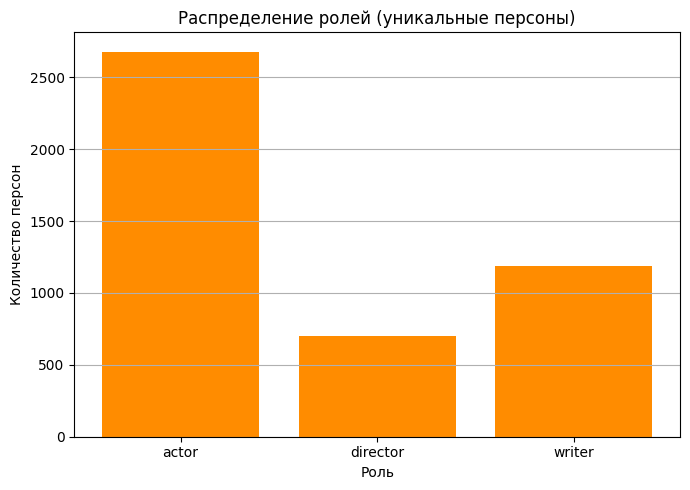

In [38]:
role_dist = pd.read_csv("role_distribution.csv")
actor_top10 = pd.read_csv("actor_top10.csv")
plt.figure(figsize=(7, 5))
plt.bar(role_dist['role'], role_dist['num_people'], color='darkorange')
plt.title("Распределение ролей (уникальные персоны)")
plt.xlabel("Роль")
plt.ylabel("Количество персон")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### C2. Топ-10 актёров по числу фильмов


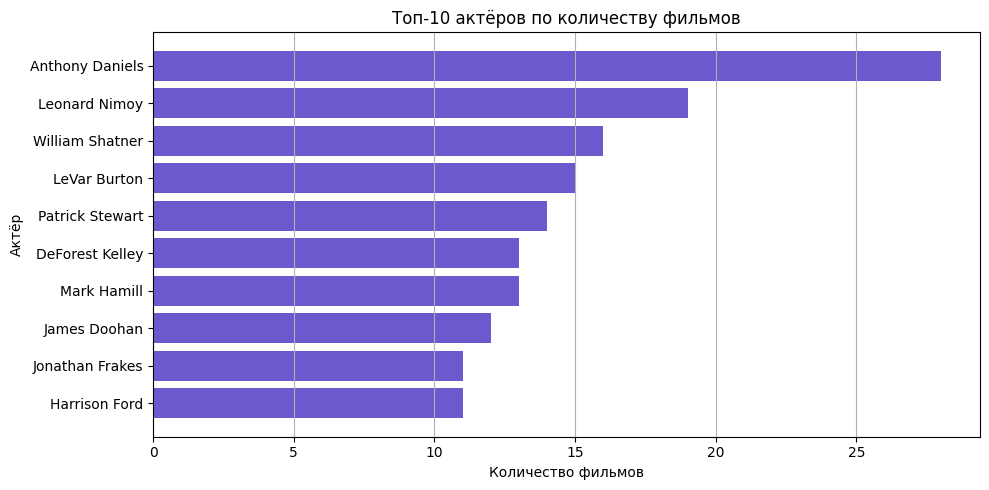

In [40]:
plt.figure(figsize=(10, 5))
plt.barh(actor_top10['full_name'], actor_top10['num_films'], color='slateblue')
plt.title("Топ-10 актёров по количеству фильмов")
plt.xlabel("Количество фильмов")
plt.ylabel("Актёр")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()


### D1. Гистограмма распределения rating

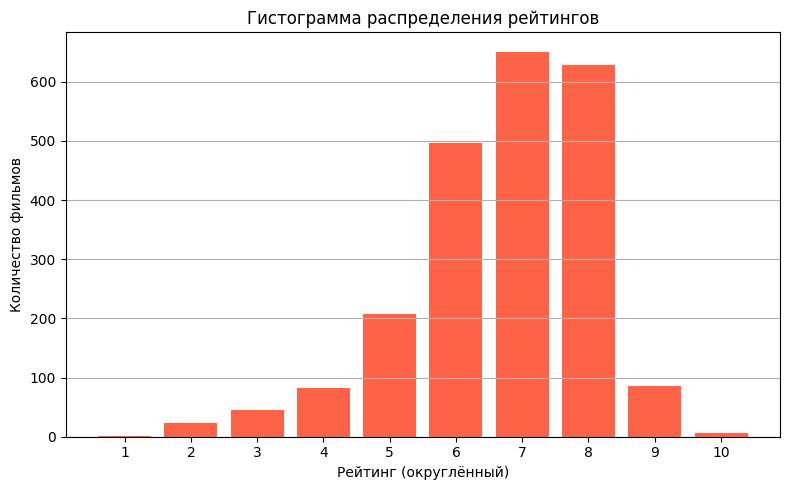

In [44]:
rating_hist = pd.read_csv("rating_histogram.csv")
type_dist = pd.read_csv("type_distribution.csv")
plt.figure(figsize=(8, 5))
plt.bar(rating_hist['rating_rounded'], rating_hist['count'], color='tomato')
plt.title("Гистограмма распределения рейтингов")
plt.xlabel("Рейтинг (округлённый)")
plt.ylabel("Количество фильмов")
plt.xticks(rating_hist['rating_rounded'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### D2. Распределение фильмов по типу (type)


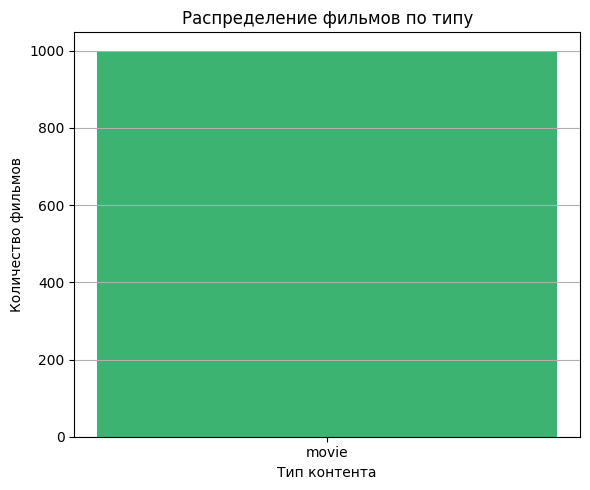

In [46]:
plt.figure(figsize=(6, 5))
plt.bar(type_dist['type'], type_dist['count'], color='mediumseagreen')
plt.title("Распределение фильмов по типу")
plt.xlabel("Тип контента")
plt.ylabel("Количество фильмов")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
